# K-Nearest Neighbors Algorithm

* A method of predictive classification using proximity and weights as decision variables
&nbsp;


* Predicting the value of a certain attribute of a data instance, assuming the dependence of that attribute on other features. (Application to regression)

## The algorithm:

* Let's say you want to classify a feature of an unknown point (instance) given other features about the instance.
&nbsp;


* K-Nearest Neighbors (KNN) says to look at the K closest points (in regards to the features you know about the instance) and use the classifications of those neighbors to predict the classification of your target instance. 
&nbsp;


* K-Nearest Neighbors (KNN) in its most basic form, uses the k closest data to the instance you are trying to predict

### Common Examples:

* KNN is easiest to visualize in applications to geospatial data
&nbsp;


* Example: Predict political affiliation of a person based on location, given affilitations of others in the neighborhood
    * Features/Attributes: location
    * Labels: republican, democrat
&nbsp;

    
* Can be extended to take into account more features than just location. I.e:
&nbsp;


* Predict political affiliation of a person based on location, age, marital status, gender, parent affiliation
    * Features: location, age, marital status, gender, parent affiliation
    * Labels: republican, democrat
&nbsp;

    
* How to decide who are the nearest neighbors?
* What if labeling isn't binary (more options than just democrat or republican?)

## Protocol and Decision Variables

* KNN looks the the K nearest neighbors, but then what? There are options with what to do with the information attained from the neighbors
&nbsp;


* Majority Vote Protocol:
    * This protocol uses a simple majority of the classifications of the nearest neighbors as its predicted classification of the new instance. 
    * Works best in case of 2 classes
&nbsp;


* "Weighted Influence" Protocol
    * This protocol uses weights (normally 1/d where d = distance of neighbor to new instance) to determine the classification of the new instance
    * Makes most sense to use this when Labeling set is a continuous real range of values. 

### Remarks
* Choose an odd K value for a 2 class problem
    * when you have 2 classes, and k = even, could have ties
* K must not be a multiple of the number of classes (possible classifications of the instance)
    * also to avoid ties
* main drawback of KNN:
    * complexity and computational expense in searching for the nearest neighbors in large data sets

Sample Code:

Automatically created module for IPython interactive environment


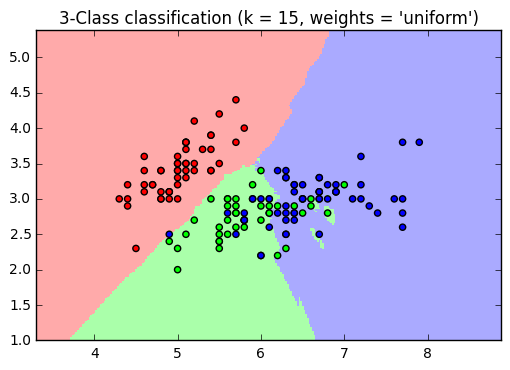

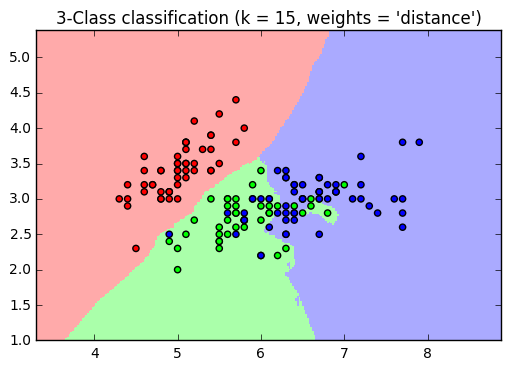

In [2]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

In [3]:
import csv
import random
import math
import operator

""" HANDLE DATA """

def loadDataset(filename, split, trainingSet=[] , testSet=[]):
    with open(filename, 'rb') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)-1):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])

"""
#TEST Handle data
trainingSet = []
testSet = []
loadDataset('iris.data.csv', 0.80, trainingSet, testSet)
print 'Train: ' + repr(len(trainingSet))
print 'Test: ' + repr(len(testSet))
"""

""" SIMILARITY """

def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

"""
#TEST Similarity

data1 = [2, 2, 2, 'a']
data2 = [4, 4, 4, 'b']
distance = euclideanDistance(data1, data2, 3)
print 'Distance: ' + repr(distance)
"""


""" NEIGHBORS """

def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance) - 1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    #print repr(distances)
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

"""
#TEST neighbors
trainSet = [[2, 2, 2, 'a'], [4, 4, 4, 'b']]
testInstance = [5, 5, 5]
k = 1
neighbors = getNeighbors(trainSet, testInstance, 1)
print(neighbors)
"""

""" RESPONSE (Using Majority Vote) """
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
        sortedVotes = sorted(classVotes.iteritems(), key = operator.itemgetter(1), reverse = True)
        return sortedVotes[0][0]

"""
#TEST Response
neighbors = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]
response = getResponse(neighbors)
print(response)
"""

""" ACCURACY """
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

"""
#TEST Accuracy
testSet = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]
predictions = ['a', 'a', 'a']
accuracy = getAccuracy(testSet, predictions)
print(accuracy)
"""

""" MAIN FUNCTION """
def main(k):
    #prepare data
    trainingSet = []
    testSet = []
    split = 0.80
    loadDataset('iris.data.csv', split, trainingSet, testSet)
    print 'Train Set: ' + repr(len(trainingSet))
    print 'Test Set: ' + repr(len(testSet))
    
    #Generate predictions
    predictions = []
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet,testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        print('> predicted = ' + repr(result) + ', actual = ' + repr(testSet[x][-1]))
    accuracy = getAccuracy(testSet, predictions)
    print( 'Accuracy: ' + repr(accuracy) + '%')

main(3)

Train Set: 122
Test Set: 28
> predicted = 'Iris-setosa', actual = 'Iris-setosa'
> predicted = 'Iris-setosa', actual = 'Iris-setosa'
> predicted = 'Iris-setosa', actual = 'Iris-setosa'
> predicted = 'Iris-setosa', actual = 'Iris-setosa'
> predicted = 'Iris-setosa', actual = 'Iris-setosa'
> predicted = 'Iris-setosa', actual = 'Iris-setosa'
> predicted = 'Iris-setosa', actual = 'Iris-setosa'
> predicted = 'Iris-setosa', actual = 'Iris-setosa'
> predicted = 'Iris-setosa', actual = 'Iris-setosa'
> predicted = 'Iris-setosa', actual = 'Iris-setosa'
> predicted = 'Iris-setosa', actual = 'Iris-setosa'
> predicted = 'Iris-setosa', actual = 'Iris-setosa'
> predicted = 'Iris-versicolor', actual = 'Iris-versicolor'
> predicted = 'Iris-versicolor', actual = 'Iris-versicolor'
> predicted = 'Iris-versicolor', actual = 'Iris-versicolor'
> predicted = 'Iris-versicolor', actual = 'Iris-versicolor'
> predicted = 'Iris-versicolor', actual = 'Iris-versicolor'
> predicted = 'Iris-virginica', actual = 'Iris-v

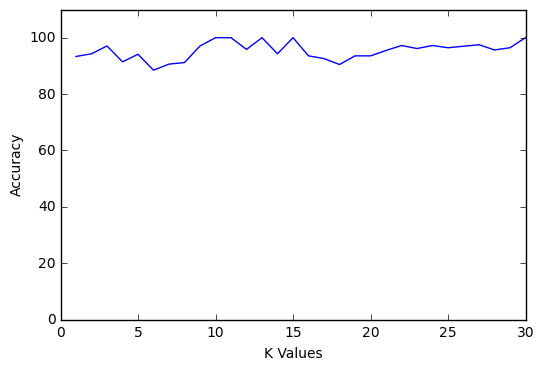

In [19]:


""" Generate an Accuracy vs k-value graph """
import operator
import math
import csv
import random
import numpy as np
import matplotlib.pyplot as plt


from KNN_Iris_example import euclideanDistance, getAccuracy, getNeighbors, getResponse, loadDataset, main

def accuracyArray(k):
    AccList = []
    for x in range(1,k+1):
        AccList.append(main(x))
    return AccList

y = np.array(accuracyArray(30))
z = []
for t in range(1,31):
    z.append(t)
x = np.array(z)

plt.plot(x,y)
plt.ylabel("Accuracy")
plt.xlabel("K Values")
plt.ylim(0,110)

plt.show()